In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
class IrisDataset(Dataset):
  def __init__(self, data, labels):
    self.data = torch.tensor(data,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [ ]:
iris = load_iris()
data = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=12)

train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

In [ ]:
# Normalize the data
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

In [ ]:
class SoftmaxRegression(torch.nn.Module):
  def __init__(self, num_features, num_classes):
    super(SoftmaxRegression, self).__init__()
    self.linear = torch.nn.Linear(num_features, num_classes)
    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  def forward(self,x):
    logits = self.linear(x)
    probas = F.softmax(logits, dim=1)
    return logits, probas

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = SoftmaxRegression(num_features=4, num_classes=3).to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def comp_accuracy(true_labels, pred_labels):
  accuracy = torch.sum(true_labels.view(-1).float() == pred_labels.float()).item() / true_labels.size(0)
  return accuracy

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_train, dtype=torch.long).to(DEVICE)
X_test = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

In [ ]:
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):

  # Compute outputs
  logits, probas = model(X_train)

  # Compute gradients
  cost = F.cross_entropy(logits, y_train.long())
  optimizer.zero_grad()
  cost.backward()

  # Update weights
  optimizer.step()

  train_losses.append(cost.item())

  # Logging
  logits, probas = model(X_train)
  acc = comp_accuracy(y_train, torch.argmax(probas, dim=1))
  print('Epoch: %03d' % (epoch + 1), end="")
  print(' | Train ACC: %.3f' % acc, end="")
  print(' | Cost: %.3f' % F.cross_entropy(logits, y_train.long()))

Epoch: 001 | Train ACC: 0.810 | Cost: 1.090
Epoch: 002 | Train ACC: 0.810 | Cost: 1.081
Epoch: 003 | Train ACC: 0.810 | Cost: 1.072
Epoch: 004 | Train ACC: 0.810 | Cost: 1.064
Epoch: 005 | Train ACC: 0.810 | Cost: 1.055
Epoch: 006 | Train ACC: 0.810 | Cost: 1.047
Epoch: 007 | Train ACC: 0.810 | Cost: 1.039
Epoch: 008 | Train ACC: 0.810 | Cost: 1.031
Epoch: 009 | Train ACC: 0.810 | Cost: 1.023
Epoch: 010 | Train ACC: 0.810 | Cost: 1.016
Epoch: 011 | Train ACC: 0.810 | Cost: 1.008
Epoch: 012 | Train ACC: 0.810 | Cost: 1.001
Epoch: 013 | Train ACC: 0.810 | Cost: 0.994
Epoch: 014 | Train ACC: 0.810 | Cost: 0.986
Epoch: 015 | Train ACC: 0.810 | Cost: 0.980
Epoch: 016 | Train ACC: 0.810 | Cost: 0.973
Epoch: 017 | Train ACC: 0.810 | Cost: 0.966
Epoch: 018 | Train ACC: 0.810 | Cost: 0.959
Epoch: 019 | Train ACC: 0.810 | Cost: 0.953
Epoch: 020 | Train ACC: 0.810 | Cost: 0.947
Epoch: 021 | Train ACC: 0.810 | Cost: 0.940
Epoch: 022 | Train ACC: 0.810 | Cost: 0.934
Epoch: 023 | Train ACC: 0.810 | 

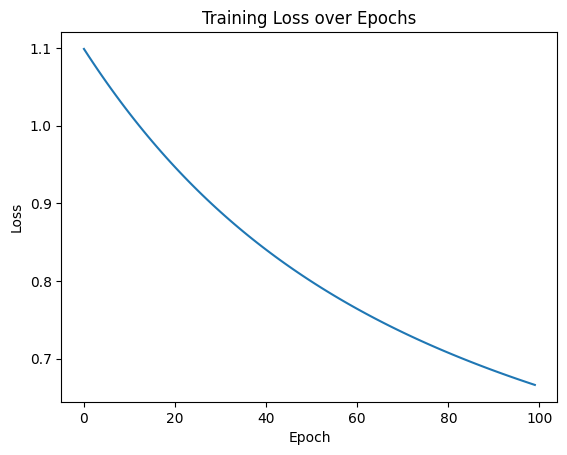

In [ ]:
# Plot training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    logits, probas = model(X_test)
    test_acc = comp_accuracy(y_test, torch.argmax(probas, dim=1))
    print('Test Accuracy: %.3f' % (test_acc*100))

Test Accuracy: 86.667
